In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [101]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [102]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [103]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-14
data: (299, 74)
pairs: (2099, 12)


In [76]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,AZUL4,-4.366844,99,0.134091,2,0.686361,0.448416,Long/Short,1,100
1,100,ABEV3,B3SA3,-5.130893,99,0.211238,2,0.647543,1.208070,Long/Short,1,100
2,240,ABEV3,BBAS3,-3.184579,95,0.224246,9,0.594911,0.624859,Short/Long,4,"100,160,220,240"
3,240,ABEV3,BBDC3,-3.027494,95,0.338413,10,0.601067,0.681712,Short/Long,6,"100,120,140,160,180,240"
4,240,ABEV3,BBDC4,-3.141569,95,0.350687,9,0.585839,0.555521,Short/Long,7,"100,120,140,160,180,220,240"
...,...,...,...,...,...,...,...,...,...,...,...,...
2094,220,VIVT4,WEGE3,-3.416142,95,0.488707,9,0.350950,0.752385,Long/Short,7,"100,120,140,160,180,200,220"
2095,250,VIVT4,YDUQ3,-4.647516,99,0.345004,4,0.333483,0.551767,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2096,240,VVAR3,WEGE3,-2.906333,95,0.573404,12,0.564006,0.382045,Short/Long,1,240
2097,180,VVAR3,YDUQ3,-3.187420,95,0.377191,7,0.568620,1.090161,Short/Long,5,"100,120,140,160,180"


In [79]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ENGI11,RENT3,-5.470307,99,0.697022,3,0.594974,1.144292,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,TAEE11,USIM5,-5.092664,99,0.855023,4,0.474471,1.089154,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,BBSE3,ITUB4,-4.390777,99,0.953032,5,0.677863,1.007609,Long/Short,9,"100,120,140,160,180,200,220,240,250"
3,250,BRAP4,BRKM5,-4.408937,99,0.740017,5,0.549764,1.157552,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,CMIG4,ENGI11,-4.275378,99,0.298523,5,0.765136,1.181897,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,RENT3,TAEE11,-4.301759,99,4.030740,5,0.580765,1.081800,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,BBAS3,COGN3,-4.429856,99,2.969905,6,0.668147,1.123145,Long/Short,9,"100,120,140,160,180,200,220,240,250"
7,250,BPAC11,ITUB4,-3.886121,99,3.892928,6,0.659182,1.026916,Short/Long,9,"100,120,140,160,180,200,220,240,250"
8,250,BRAP4,CSAN3,-4.082388,99,0.374019,6,0.600776,1.198067,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,250,BRAP4,KLBN11,-4.073672,99,1.565710,6,0.438110,1.197586,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [81]:
#plot_pairs(pairs_signal, data)

In [8]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [9]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [10]:
oper = pd.read_csv('datasets/oper/13072020.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


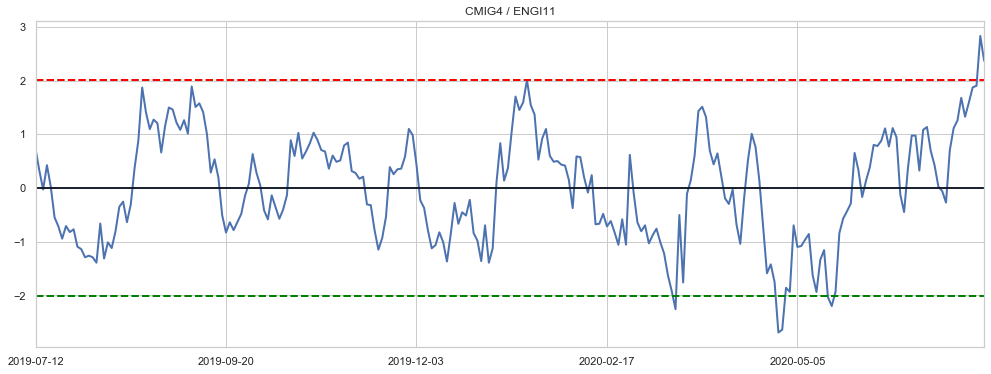

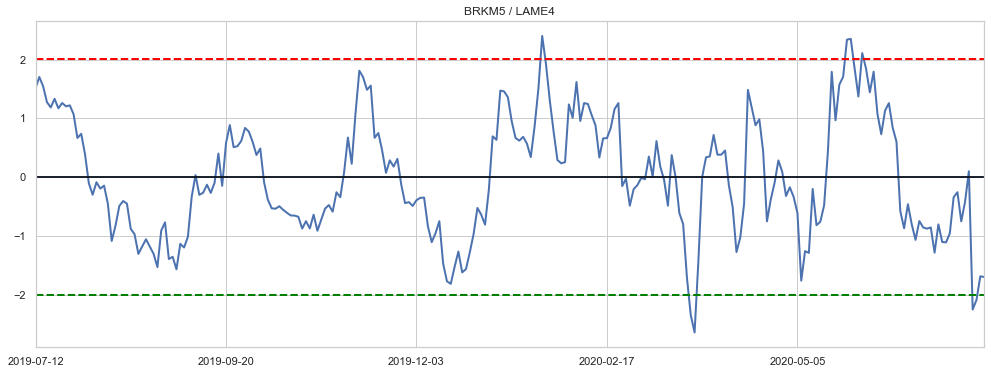

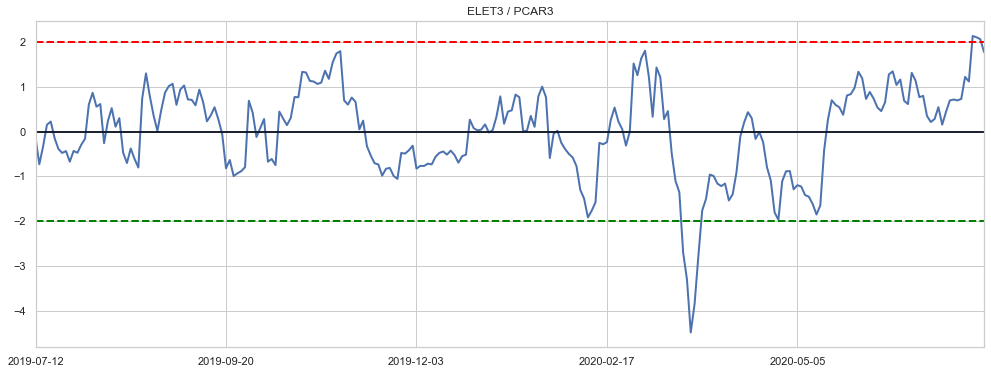

In [11]:
plot_pairs(oper, data)

In [12]:
mult.summary(data, 'CMIG4', 'ENGI11', 250)
mult.summary(data, 'BRKM5', 'LAME4', 250)
mult.summary(data, 'ELET3', 'PCAR3', 250)

Período de Análise                   250   Entrada      Venda:CMIG4 / Compra:ENGI11
Independente                       CMIG4   Dependente                        ENGI11
R$                                 11.41   R$                                  46.4
Ratio                 0.2459051610385908   
→ CASH NEUTRAL ←
CMIG4                          -406.6608   Financeiro R$                 -4639.9997
ENGI11                               100   Financeiro R$                     4640.0
                                                                             0.0003
→ BETA NEUTRAL ←
ENGI11                                29   Financeiro R$                     1345.6
CMIG4                               -100   Financeiro R$                    -1141.0
                                                                              204.6
Somente para operação Beta Neutral:
Retorno  (%)          11.712667375293794   Gain                  157.95052874936897
Atual    (%)          13.843166596114687   Los